# Required Files

https://dosya.co/e8g7i0cwfgju/SSD.zip.html


In [11]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [12]:
CLASSES = ["background","aeroplane","bicycle","bird","boat","bottle","bus","car","cat",
          "chair","cow","diningtable","dog","horse","motorbike","person","pottedplant","sheep","sofa","train","tvmonitor"]

In [13]:
COLORS = np.random.uniform(0,255,size=(len(CLASSES),3))

net = cv2.dnn.readNetFromCaffe("MobileNetSSD_deploy.prototxt.txt","MobileNetSSD_deploy.caffemodel")




# Code for Object Detection on Images 

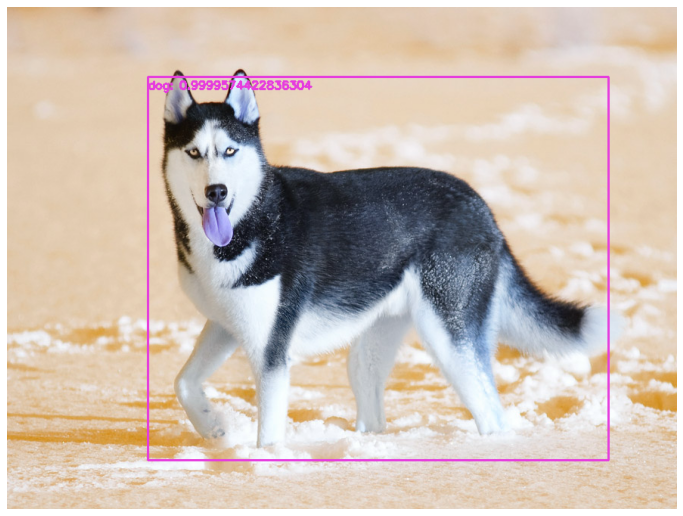

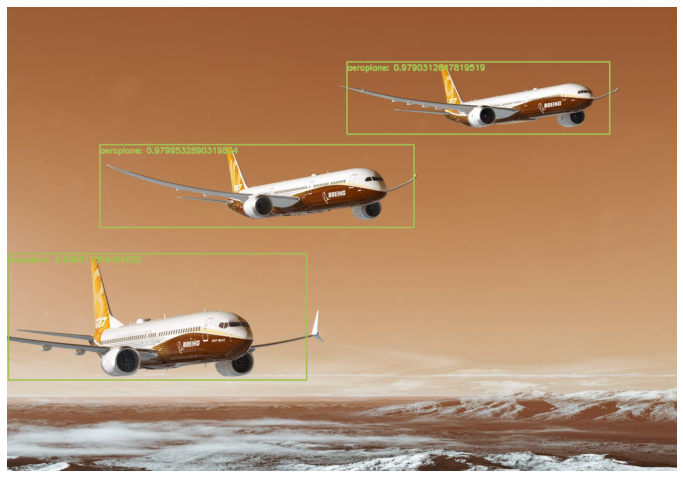

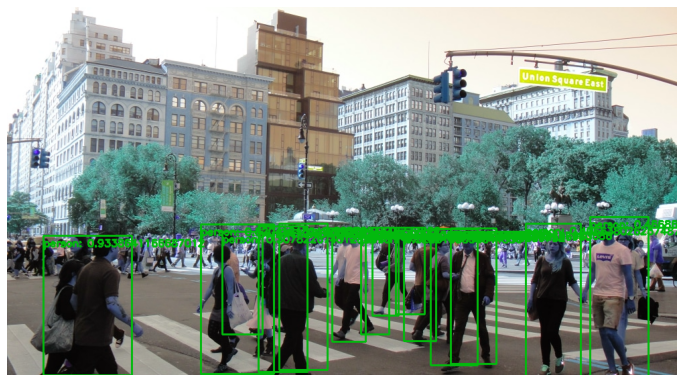

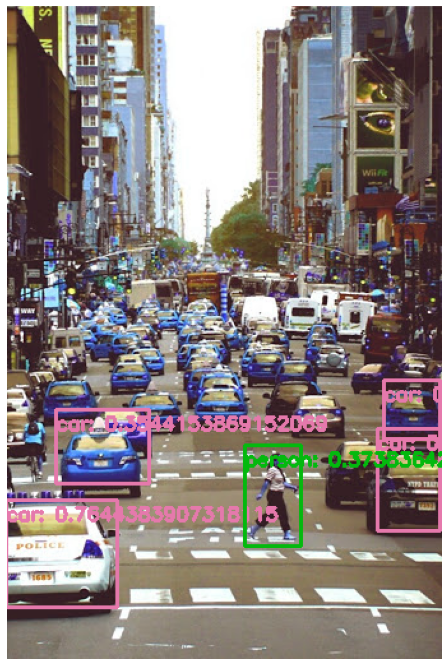

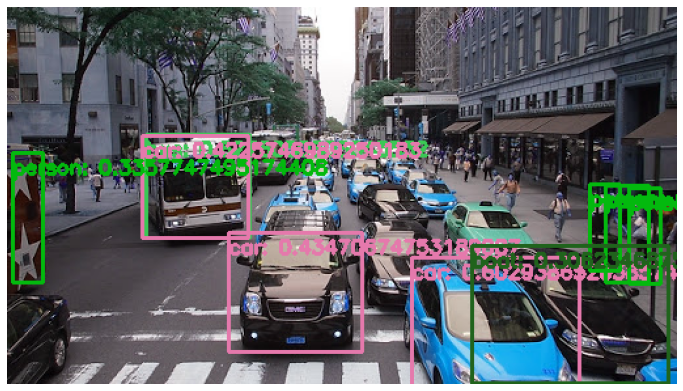

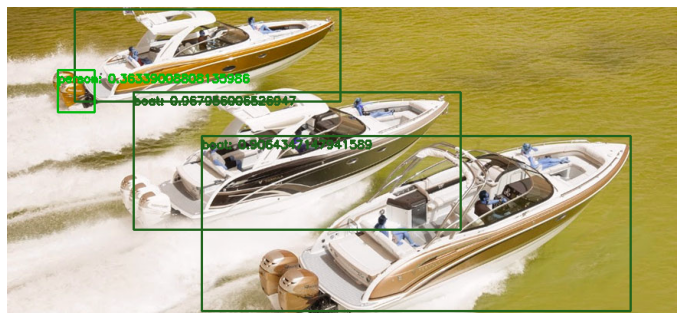

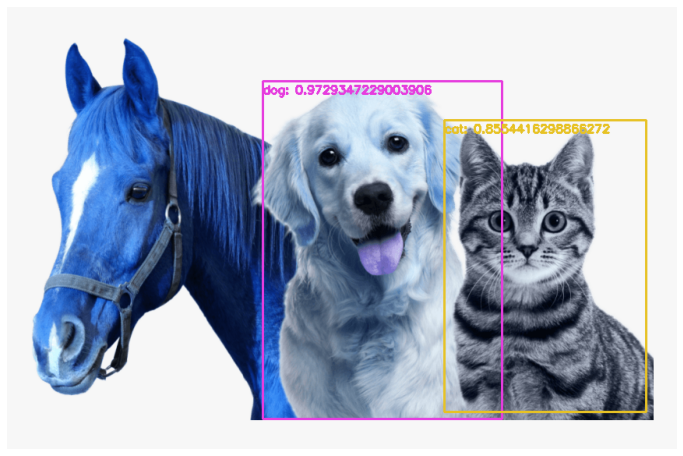

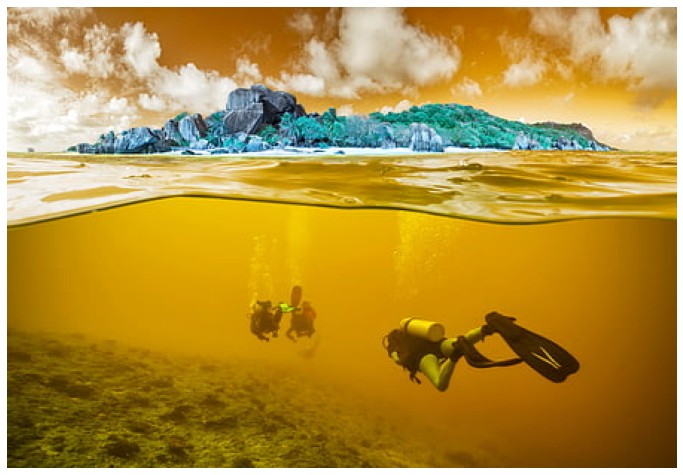

In [14]:
files = os.listdir()
img_path_list = []

for f in files:
    if f.endswith(".jpg"):
        img_path_list.append(f)

                    
for i in img_path_list:
          
    image = cv2.imread(i)
    (h,w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)),0.007843,(300,300),127.5)
        
    net.setInput(blob)
    detections = net.forward()
        
    for j in np.arange(0, detections.shape[2]):
            
        confidence = detections[0,0,j,2]
            
        if confidence > 0.3:
                
            idx = int(detections[0,0,j,1])
            box = detections[0,0,j,3:7] * np.array([w,h,w,h])
            (startX,startY,endX,endY) = box.astype("int")
                
            label = f'{CLASSES[idx]}: {confidence}'
            cv2.rectangle(image, (startX,startY),(endX,endY), COLORS[idx],2)
                
            y = startY - 16 if startY -16 < 15 else startY + 16
            cv2.putText(image,label,(startX,y), cv2.FONT_HERSHEY_SIMPLEX,0.5,COLORS[idx],2)
    cv2.imshow("ssd",image)
    plt.figure(figsize=(12,12)),plt.imshow(image),plt.axis("off")
    
    if cv2.waitKey(0) & 0xFF == ord("q"):
        continue
            
cv2.destroyAllWindows()
            

# Code for Object Detection on Camera    

In [5]:
vc = cv2.VideoCapture(0)
vc.set(3,800)
vc.set(4,600)

while True:
          
    success, image = vc.read()
    (h,w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)),0.007843,(300,300),127.5)
        
    net.setInput(blob)
    detections = net.forward()
        
    for j in np.arange(0, detections.shape[2]):
            
        confidence = detections[0,0,j,2]
            
        if confidence > 0.3:
                
            idx = int(detections[0,0,j,1])
            box = detections[0,0,j,3:7] * np.array([w,h,w,h])
            (startX,startY,endX,endY) = box.astype("int")
                
            label = f'{CLASSES[idx]}: {confidence}'
            cv2.rectangle(image, (startX,startY),(endX,endY), COLORS[idx],2)
                
            y = startY - 16 if startY -16 < 15 else startY + 16
            cv2.putText(image,label,(startX,y), cv2.FONT_HERSHEY_SIMPLEX,0.5,COLORS[idx],2)
    cv2.imshow("ssd",image)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

vc.release()
cv2.destroyAllWindows()

            